<a href="https://colab.research.google.com/github/DanielaJim07/Simulaci-n-I/blob/main/Aceptaci%C3%B3n_y_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método de Aceptación y Rechazo para la Distribución Triangular

El **método de aceptación y rechazo** permite generar muestras aleatorias de una distribución objetivo \( f(x) \), utilizando una distribución propuesta \( g(x) \), y una constante \( M \) tal que:

$$
f(x) \leq M \cdot g(x), \quad \forall x
$$

### Pasos:
1. Generar $$ x \sim g(x) $$ (por ejemplo, uniforme en [a, c])
2. Generar $$R \sim \mathcal{U}(0,1) $$
3. Aceptar $$ x $$ si:

$$
R \leq \frac{f(x)}{M \cdot g(x)}
$$

### Distribución Triangular

Para una distribución triangular con parámetros \( a < b < c \), su función de densidad es:

$$
f(x) =
\begin{cases}
\frac{2(x - a)}{(b - a)(c - a)} & \text{si } a \le x \le b \\
\frac{2(c - x)}{(c - a)(c - b)} & \text{si } b < x \le c \\
0 & \text{en otro caso}
\end{cases}
$$

La densidad alcanza su valor máximo en \( x = b \), y es:

$$
f(b) = \frac{2}{c - a}
$$

Por lo tanto, se puede tomar:

$$
g(x) = \text{Uniforme}(a, c), \quad M = \frac{2}{c - a}
$$


In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Parámetros de la distribución triangular
a = 1  # Límite inferior
b = 3  # Moda
c = 5  # Límite superior


In [4]:
# Función de densidad de la distribución triangular
def triangular_pdf(x):
    if a <= x <= b:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif b < x <= c:
        return 2 * (c - x) / ((c - a) * (c - b))
    else:
        return 0


In [5]:
# Método de aceptación y rechazo
def aceptacion_rechazo(n):
    muestras = []
    M = 1  # Cota superior de la densidad triangular (su valor máximo es en x = b)

    for _ in range(n):
        R1 = rd.random()
        R2 = rd.random()

        # x generado uniformemente en [a, c]
        x = a + (c - a) * R1

        # Si R2 cae bajo la curva de f(x)/M, se acepta
        if R2 <= triangular_pdf(x) / M:
            muestras.append(x)

    return muestras

In [6]:
# Generar muestras
datos = aceptacion_rechazo(10000)

(array([0.03026   , 0.04539   , 0.05547667, 0.07060667, 0.10086667,
        0.14625667, 0.09078   , 0.14625667, 0.15634333, 0.18156   ,
        0.18660333, 0.24208   , 0.23199333, 0.27738333, 0.25216667,
        0.32277333, 0.33790333, 0.35303333, 0.3026    , 0.37825   ,
        0.48416   , 0.40851   , 0.40851   , 0.44381333, 0.48920333,
        0.50937667, 0.58502667, 0.55476667, 0.38833667, 0.43877   ,
        0.32277333, 0.31773   , 0.32781667, 0.40851   , 0.35807667,
        0.26225333, 0.31268667, 0.21182   , 0.18660333, 0.22695   ,
        0.29251333, 0.18660333, 0.16138667, 0.17147333, 0.16643   ,
        0.10086667, 0.04539   , 0.11599667, 0.08069333, 0.06556333]),
 array([1.02991612, 1.10718875, 1.18446138, 1.261734  , 1.33900663,
        1.41627926, 1.49355188, 1.57082451, 1.64809714, 1.72536976,
        1.80264239, 1.87991502, 1.95718765, 2.03446027, 2.1117329 ,
        2.18900553, 2.26627815, 2.34355078, 2.42082341, 2.49809603,
        2.57536866, 2.65264129, 2.72991391, 2.

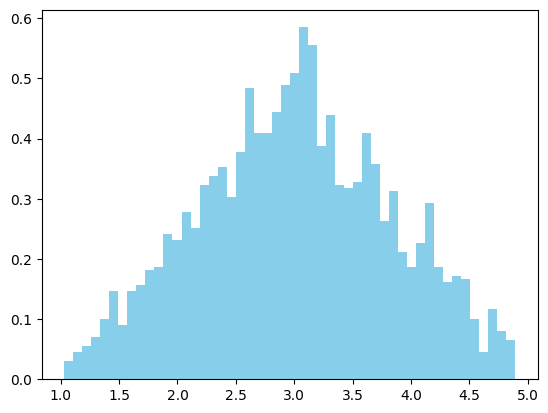

In [7]:
# Graficar histograma
plt.hist(datos, bins=50, color='skyblue', density=True, label='Muestras generadas')

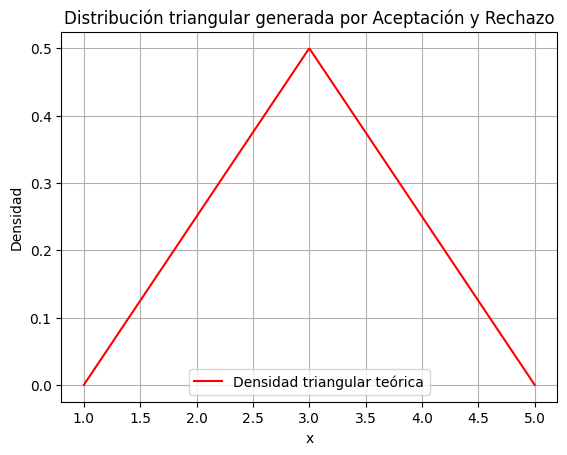

In [8]:
# Comparar con función teórica
x_vals = np.linspace(a, c, 500)
y_vals = [triangular_pdf(x) for x in x_vals]
plt.plot(x_vals, y_vals, color='red', label='Densidad triangular teórica')

plt.title('Distribución triangular generada por Aceptación y Rechazo')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()



In [9]:
# Estadísticas básicas
print("Media:", np.mean(datos))
print("Varianza:", np.var(datos))
print("Tamaño de muestra:", len(datos))


Media: 3.0088316570400955
Varianza: 0.6753177129496531
Tamaño de muestra: 2566
